In [1]:
import sys
import numpy as np
import tensorflow as tf

from train import Trainer
from dataset.data_reader import PoseDataReader

Found horovod module, will use distributed training


In [2]:
from utils.parse_config import parse_config

cfg = parse_config('config.yaml')
data_cfg = cfg['data_config']
train_cfg = cfg['train_config']
model_cfg = cfg['model_config']

data_reader = PoseDataReader(data_cfg)

4it [00:00, 38.36it/s]

loading annotations into memory...
Done (t=0.02s)
creating index...


554it [00:02, 217.36it/s]
  1%|          | 6/554 [00:00<00:09, 55.66it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_Lab_July18_Recording_16.records


100%|██████████| 554/554 [00:04<00:00, 113.37it/s]
0it [00:00, ?it/s]

loading annotations into memory...
Done (t=0.03s)
creating index...


630it [00:04, 138.20it/s]
 13%|█▎        | 81/630 [00:00<00:00, 722.18it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_Lab_July18_Recording_G1.records


100%|██████████| 630/630 [00:00<00:00, 655.61it/s]
0it [00:00, ?it/s]

loading annotations into memory...
Done (t=0.14s)
creating index...


1389it [00:06, 210.29it/s]
  1%|          | 9/1389 [00:00<00:18, 73.70it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_Lab_July25_recording_0.records


100%|██████████| 1389/1389 [00:29<00:00, 46.80it/s]
0it [00:00, ?it/s]

loading annotations into memory...
Done (t=0.08s)
creating index...


1001it [00:08, 112.11it/s]
  2%|▏         | 20/1001 [00:00<00:05, 188.36it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_Lab_July25_recording_56.records


100%|██████████| 1001/1001 [00:10<00:00, 94.54it/s]
0it [00:00, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...


50it [00:00, 94.38it/s]
100%|██████████| 50/50 [00:00<00:00, 9853.19it/s]


index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_Lab_Aug16.records
loading annotations into memory...


7564it [00:52, 145.18it/s]
  0%|          | 0/7550 [00:00<?, ?it/s]

Done (t=0.85s)
creating index...
index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_Walmart_Round8_Recording_40.records


100%|██████████| 7550/7550 [05:33<00:00, 22.62it/s]
1it [00:00,  7.66it/s]

loading annotations into memory...
Done (t=0.01s)
creating index...


551it [00:03, 149.38it/s]
100%|██████████| 551/551 [00:00<00:00, 6864.90it/s]
8it [00:00, 77.79it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_StLouis_Kinect_August08_Kushal_extreme_poses_Recording_53.records
loading annotations into memory...
Done (t=0.00s)
creating index...


407it [00:02, 153.89it/s]
100%|██████████| 406/406 [00:00<00:00, 12428.57it/s]
13it [00:00, 121.85it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_StLouis_Kinect_August08_Kushal_extreme_poses_Recording_56.records
loading annotations into memory...
Done (t=0.00s)
creating index...


492it [00:02, 183.81it/s]
100%|██████████| 479/479 [00:00<00:00, 7027.43it/s]
9it [00:00, 87.37it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_StLouis_Kinect_August08_Kushal_extreme_poses_Recording_57.records
loading annotations into memory...
Done (t=0.01s)
creating index...


908it [00:05, 164.59it/s]
  1%|          | 11/900 [00:00<00:12, 71.58it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_StLouis_Kinect_August08_MultipleShoppers_Recording_53.records


100%|██████████| 900/900 [00:02<00:00, 304.07it/s]
1it [00:00,  6.34it/s]

loading annotations into memory...
Done (t=0.01s)
creating index...


948it [00:06, 145.57it/s]
  0%|          | 0/932 [00:00<?, ?it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_StLouis_Kinect_August08_MultipleShoppers_Recording_56.records


100%|██████████| 932/932 [00:13<00:00, 70.21it/s]
7it [00:00, 67.71it/s]

loading annotations into memory...
Done (t=0.05s)
creating index...


627it [00:03, 158.12it/s]
  1%|          | 5/559 [00:00<00:11, 46.38it/s]

index created!
Creating tf records :  /media/admin-u/data/TrainData/tfrecords/pose/ava_StLouis_Kinect_August08_MultipleShoppers_Recording_57.records


100%|██████████| 559/559 [00:04<00:00, 119.05it/s]


In [2]:
with tf.Session() as sess:
    trainer = Trainer('config.yaml')
    dataset = trainer.get_features_labels_data()
    # dataset = dataset.batch(2)
    iterator = dataset.make_initializable_iterator()
    next_element = iterator.get_next()
    counter = 0
    sess.run(iterator.initializer)
    dps = []
    while counter < 25:
        dp = sess.run(next_element)
        dps.append(dp)
        #print(dp)
        counter += 1

In [13]:
bbox_classes = dps[0][1]['bboxes']['classes'][0]
tf.expand_dims(bbox_classes, axis=0).shape

TensorShape([Dimension(1), Dimension(1500)])

In [11]:
20*20*3 + 10*10*3

1500

In [12]:
bbox_classes = dps[0][1]['bboxes']['weights'][0]
bbox_classes.shape

(1500,)

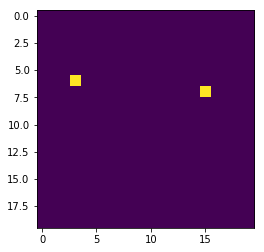

In [12]:
bbox_weights = dps[0][1]['bboxes']['weights'][0][:1200]
bbox_classes = dps[0][1]['bboxes']['classes'][0][:1200]
bbox_classes = bbox_classes.reshape([20, 20, 3])[:, :, 1]
bbox_weights = bbox_weights.reshape([20, 20, 3])[:, :, 1]
plt.imshow(bbox_classes * bbox_weights)

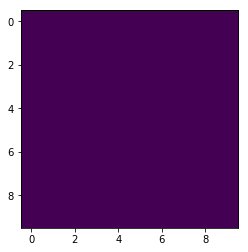

In [13]:
bbox_weights = dps[2][1]['bboxes']['feat_2']['weights'][0]
bbox_classes = dps[2][1]['bboxes']['feat_2']['classes'][0]
bbox_classes = bbox_classes.reshape([10, 10, 3])[:, :, 0]
bbox_weights = bbox_weights.reshape([10, 10, 3])[:, :, 0]
plt.imshow(bbox_classes * bbox_weights)

In [ ]:
bbox_weights = dps[0][1]['bboxes']['feat_2']['weights'][0]


In [18]:
bbox_regs = dps[1][1]['bboxes']['feat_1']['regs'][0]
bbox_regs[bbox_regs[:, 2] - bbox_regs[:, 0] > 0]

array([[0.54014605, 0.2080292 , 0.9726278 , 0.7080292 ]], dtype=float32)

In [22]:
np.repeat(np.expand_dims(np.arange(8), 1), 9, axis=0).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 7, 7, 7, 7, 7])

In [17]:
labels['heatmaps'][0].nonzero()

(array([ 4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,
         7, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14,
        14, 14, 18, 18, 18, 19, 19, 19, 20, 20, 20]),
 array([17, 18, 19, 14, 15, 16, 17, 18, 19, 14, 15, 16, 17, 18, 19, 14, 15,
        16, 17, 18, 19, 17, 18, 19, 37, 38, 39, 17, 18, 19, 37, 38, 39, 37,
        38, 39, 37, 38, 39, 37, 38, 39, 37, 38, 39]),
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

In [15]:
labels['vecmaps'][0].nonzero()

(array([ 4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 11, 11, 11,
        11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]),
 array([17, 17, 18, 18, 19, 19, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17,
        18, 18, 19, 19, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17,
        18, 19, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 18,
        18, 19, 19, 17, 17, 18, 18, 19, 19, 37, 37, 38, 39, 39, 17, 17, 18,
        18, 19, 19, 37, 37, 38, 39, 39, 37, 37, 38, 39, 39, 37, 37, 37, 37,
        38, 38, 38, 39, 39, 39, 39, 39, 39, 37, 37, 37, 38, 38, 39, 39, 39,
        39, 37, 37, 37

In [14]:
116/4

29.0

In [7]:
labels['vecmaps'][0][8, 30, 7]

7.0

In [7]:
pairs

[[0, 1], [1, 2]]

In [11]:
for i, (kp1, kp2) in enumerate(pairs):
    print(i, kp1, kp2)

0 0 1
1 1 2


0 1 ***************************
-2.0 -6.0
-3.0 -6.0
-4.0 -6.0
-2.0 -7.0
-3.0 -7.0
-4.0 -7.0
-2.0 -8.0
-3.0 -8.0
-4.0 -8.0
-1.0 -5.0
-2.0 -5.0
-3.0 -5.0
-1.0 -6.0
-2.0 -6.0
-3.0 -6.0
-1.0 -7.0
-2.0 -7.0
-3.0 -7.0
2 1 ***************************
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
3.0 -6.0
2.0 -6.0
1.0 -6.0
3.0 -7.0
2.0 -7.0
1.0 -7.0
3.0 -8.0
2.0 -8.0
1.0 -8.0
0.0 -8.0
-1.0 -8.0
-2.0 -8.0
0.0 -9.0
-1.0 -9.0
-2.0 -9.0
0.0 -10.0
-1.0 -10.0
-2.0 -10.0
8.0 -7.0
7.0 -7.0
6.0 -7.0
8.0 -8.0
7.0 -8.0
6.0 -8.0
8.0 -9.0
7.0 -9.0
6.0 -9.0
0 1 ***************************
4.0 1.0
3.0 1.0
2.0 1.0
4.0 0.0
3.0 0.0
2.0 0.0
4.0 -1.0
3.0 -1.0
2.0 -1.0
-1.0 -5.0
-2.0 -5.0
-3.0 -5.0
-1.0 -6.0
-2.0 -6.0
-3.0 -6.0
-1.0 -7.0
-2.0 -7.0
-3.0 -7.0
2 1 ***************************
2.0 -10.0
1.0 -10.0
0.0 -10.0
2.0 -11.0
1.0 -11.0
0.0 -11.0
2.0 -12.0
1.0 -12.0
0.0 -12.0
0 1 ***************************
4.0 2.0
3.0 2.0
2.0 2.0
4.0 1.0
3.0 1.0
2.0 1.0
4.0 0.0
3.0 0.0
2.0 0.0
2 1 *****

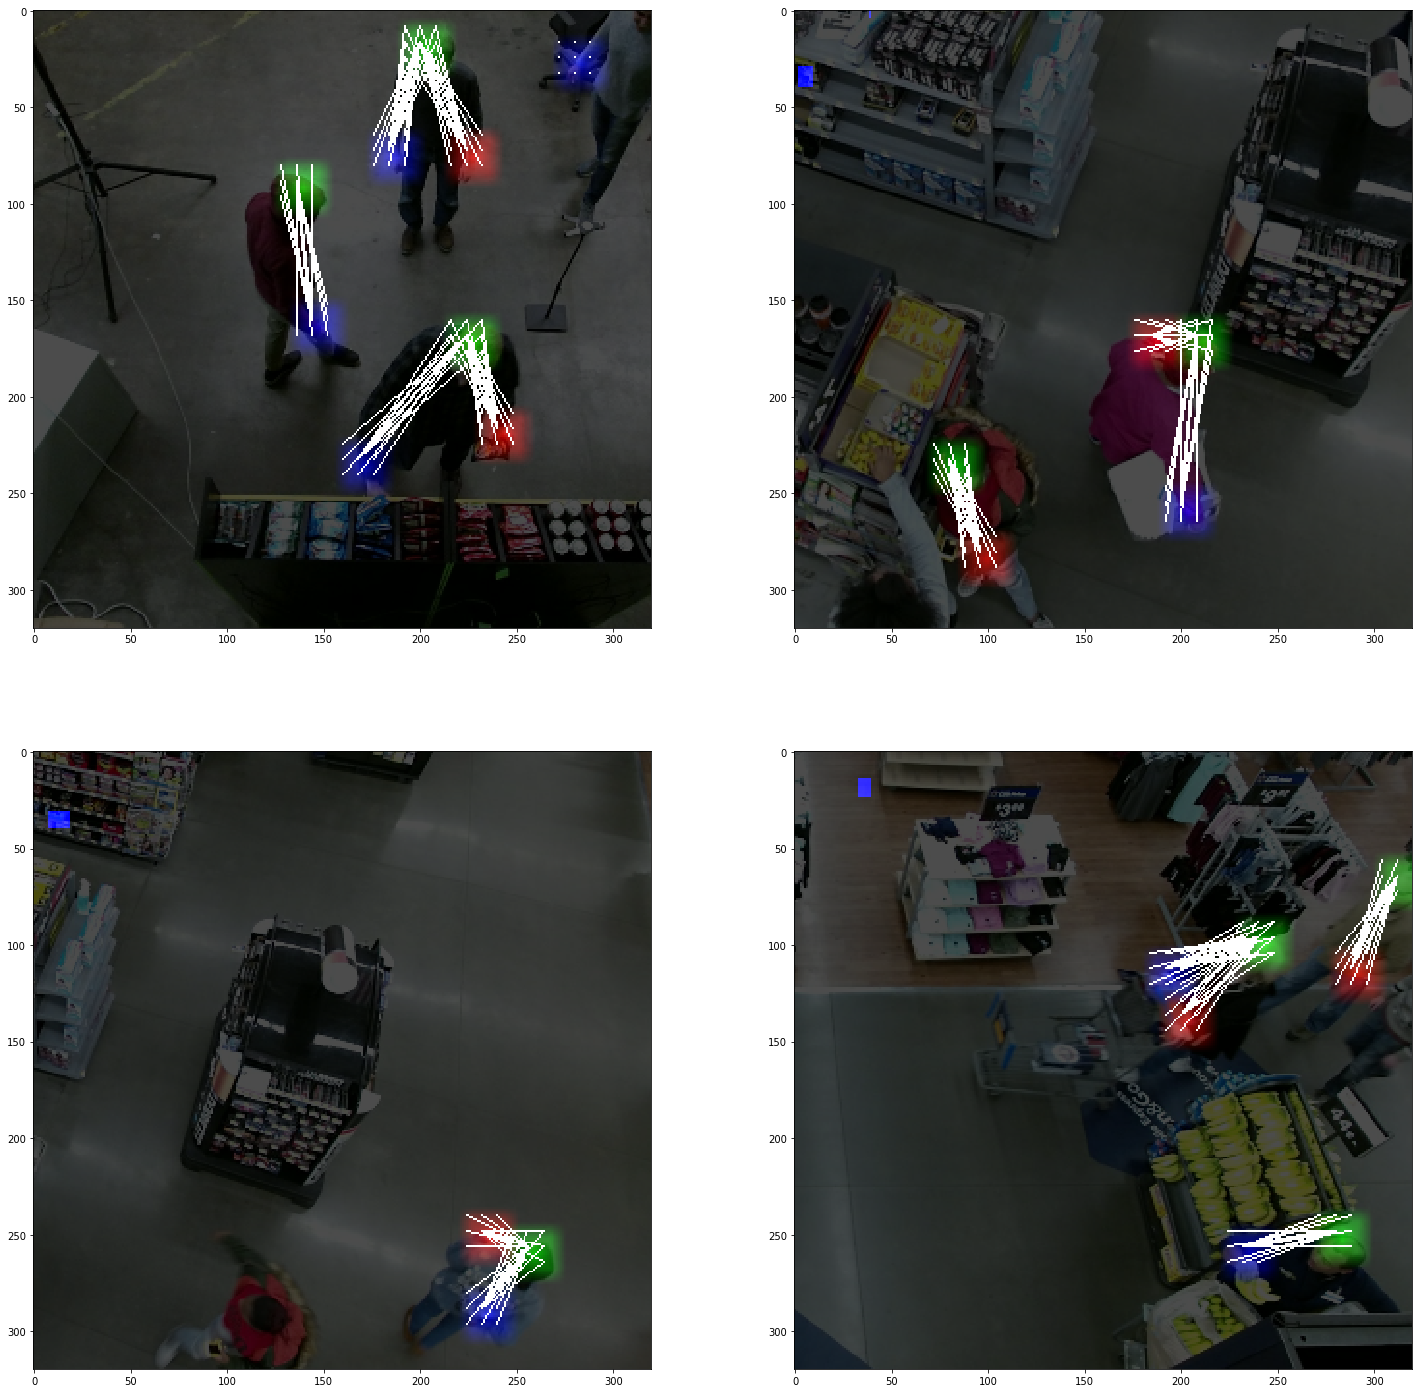

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

fig, axes = plt.subplots(2, 2, figsize=(25, 25))

for i, ax in enumerate(axes.flatten()):
    features, labels = dps[i]
    img = features['images'][0].astype(np.uint8)
    #     kp = np.zeros((40, 40, 3), dtype=np.uint8)
    #     kp[:, :, 0] = (255. * labels['heatmaps'][0][:, :, 0]).astype(np.uint8)
    #     kp[:, :, 1] = (255. * labels['heatmaps'][0][:, :, 1]).astype(np.uint8)
    kp = (255. * labels['heatmaps'][0]).astype(np.uint8)
    kp = cv2.resize(kp, (320, 320))
    img = cv2.addWeighted(img, 0.3, kp, .7, 0)
    vecmaps = labels['vecmaps'][0]
    pairs = [[0, 1], [2, 1]]
    heatmaps = labels['heatmaps'][0]
    scale_h, scale_w = 8, 8
    for i, (kp1, kp2) in enumerate(pairs):
        print(kp1, kp2, "***************************")
        y_indices_1, x_indices_1 = heatmaps[:, :, kp1].nonzero()
        for x, y in zip(x_indices_1, y_indices_1):
            x0, y0 = scale_w * x, scale_h * y
            delta_x = scale_w * int(vecmaps[y, x, 4 * i])
            delta_y = scale_h * int(vecmaps[y, x, 4 * i + 1])
            print(vecmaps[y, x, 4 * i], vecmaps[y, x, 4 * i + 1])
            img = cv2.line(img, (x0, y0),
                          (x0 + delta_x, y0 + delta_y),
                          (255, 255, 255), 1)
        y_indices_2, x_indices_2 = heatmaps[:, :, kp2].nonzero()
        for x, y in zip(x_indices_2, y_indices_2):
            x0, y0 = scale_w * x, scale_h * y
            delta_x = scale_w * int(vecmaps[y, x, 4 * i + 2])
            delta_y = scale_h * int(vecmaps[y, x, 4 * i + 3])
            # print(vecmaps[x, y, 4 * i + 2], vecmaps[x, y, 4 * i + 3])
            img = cv2.line(img, (x0, y0),
                          (x0 + delta_x, y0 + delta_y),
                          (255, 255, 255), 1)
    mask = np.where(labels['masks'][0] == 0)
    img[mask[0], mask[1], 2] = 255 
    ax.imshow(img)

In [13]:
{k: v for k, v in train_cfg.__dict__.items() if isinstance(v, (int, float, list, tuple, str
                                                               , ))}

{'batch_size': 2,
 'filenames_shuffle_buffer_size': 100,
 'is_training': True,
 'learning_rate': 0.001,
 'model_dir': './models',
 'num_epochs': 0,
 'num_parallel_map_calls': 2,
 'num_readers': 2,
 'prefetch_size': 32,
 'read_block_length': 32,
 'shuffle': True,
 'shuffle_buffer_size': 2048,
 'train_keypoints': ['left_wrist', 'right_wrist']}

In [37]:
train_cfg.__dict__

{'augmentation': {'flip_left_right': True,
  'random_crop': True,
  'scale_range': [0.5, 2.0]},
 'batch_size': 2,
 'filenames_shuffle_buffer_size': 100,
 'is_training': True,
 'learning_rate': 0.001,
 'learning_rate_decay': {'decay_rate': 0.95, 'decay_steps': 10000},
 'model_dir': './models',
 'num_epochs': 0,
 'num_parallel_map_calls': 2,
 'num_readers': 2,
 'optimizer': {'name': 'adam',
  'params': {'beta1': 0.9, 'beta2': 0.999, 'epsilon': '1e-8'}},
 'prefetch_size': 32,
 'preprocess': {'image_resize': [320, 320]},
 'read_block_length': 32,
 'shuffle': True,
 'shuffle_buffer_size': 2048,
 'train_keypoints': ['left_wrist', 'right_wrist']}